<a href="https://colab.research.google.com/github/Ziad-o-Yusef/Deep-learning-notes/blob/main/14_BIRDS_400_Image_classification_with_Pre_trained_CNN_model_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import os 
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


https://www.kaggle.com/datasets/gpiosenka/100-bird-species/code

In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Kaggle_MyAPI'

In [4]:
! kaggle datasets download -d gpiosenka/100-bird-species

100% 1.49G/1.49G [00:18<00:00, 77.5MB/s]
100% 1.49G/1.49G [00:18<00:00, 88.3MB/s]


In [ ]:
!unzip /content/100-bird-species.zip

In [7]:
dir = '/content/train'
dirs = os.listdir(dir)
imshow_dirs = []
for i in dirs : 
    step = os.listdir(dir+ '/'+ i)
    for x in range(1):
      imshow_dirs.append(dir+ '/' + i + '/' + step[x])
print(len(imshow_dirs))   

400


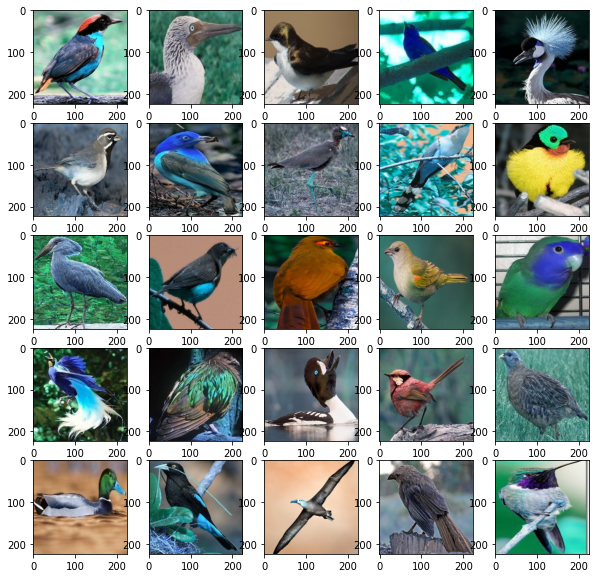

In [8]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for n in range(5):
    for m in range(5):
        path =imshow_dirs[m + 5*n]
        image = cv2.imread(str(path))
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

In [52]:
train_path = '/content/train'
test_path = '/content/test'
val_path = '/content/valid'
train_generation = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
      train_path,
      target_size=(224,224),
      batch_size=30,
      class_mode='categorical',
     
    )
test_generation = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
      test_path,
      target_size=(224,224),
      batch_size=30,
      class_mode='categorical',
      
    )
val_generation = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
      val_path,
      target_size=(224,224),
      batch_size=30,
      class_mode='categorical',
      
    )

Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


In [ ]:
base_model = tf.keras.applications.vgg16.VGG16(weights = "imagenet", include_top=False, input_shape = (224,224, 3))
#base_model.summary()

In [47]:
for layer in base_model.layers:
    layer.trainable = False

base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [75]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model
last_layer = base_model.get_layer('block5_pool')
last_output = last_layer.output
x = Flatten()(last_output)
x = Dense(2048, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.6)(x)
x = Dense(400, activation='softmax')(x)
new_model = Model(inputs=base_model.input, outputs=x)


In [76]:
new_model.summary()

In [77]:
new_model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
new_model.fit_generator(train_generation, steps_per_epoch=4,
                   validation_data=test_generation, validation_steps=2, epochs=1000, verbose=2)

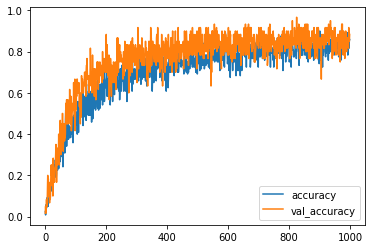

In [79]:
losse = pd.DataFrame(new_model.history.history)
losse[['accuracy','val_accuracy']].plot()


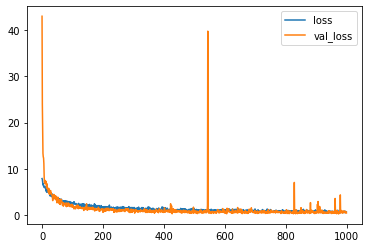

In [80]:
losse = pd.DataFrame(new_model.history.history)
losse[['loss','val_loss']].plot()

In [81]:
new_model.evaluate_generator(test_generation, verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


67/67 - 11s - loss: 0.6044 - accuracy: 0.8560 - 11s/epoch - 157ms/step


[0.6044275760650635, 0.8560000061988831]

In [82]:
new_model.evaluate_generator(val_generation, verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


67/67 - 11s - loss: 0.7148 - accuracy: 0.8460 - 11s/epoch - 158ms/step


[0.7147520780563354, 0.8460000157356262]